In [1]:

import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from data import *
from utils import set_random_seeds, get_device
from ae import *
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight
import joblib
from mlp import *
import neurokit2 as nk

In [2]:
# Configuration
DATA_ROOT = 'data'
GESTURE = 1
# INCLUDE_CHANNELS = [9,10,11,12,13,14,15,16,18,19,20,21,22,23]
INCLUDE_CHANNELS = [9,10,11]
FS = 2000
RANDOM_SEED = 42

set_random_seeds(RANDOM_SEED)

In [3]:
# Load raw data
metadata, signals, channel_names = load_emg_data(
    data_root=DATA_ROOT,
    gesture=GESTURE,
    include_indices=INCLUDE_CHANNELS
)

print(f"\nSignal shape: {signals.shape}")
print(f"Number of trials: {len(metadata)}")
print(f"Number of subjects: {metadata['subject'].nunique()}")
print(f"Channels: {len(channel_names)}")

Loaded 903 trials for gesture 1
Shape: (903, 10240, 3)
Subjects: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43)]

Signal shape: (903, 10240, 3)
Number of trials: 903
Number of subjects: 43
Channels: 3


In [4]:
signals_clean = clean_all_trials(signals, fs=FS)

Cleaning 903 trials...
  Cleaned 50/903
  Cleaned 100/903
  Cleaned 150/903
  Cleaned 200/903
  Cleaned 250/903
  Cleaned 300/903
  Cleaned 350/903
  Cleaned 400/903
  Cleaned 450/903
  Cleaned 500/903
  Cleaned 550/903
  Cleaned 600/903
  Cleaned 650/903
  Cleaned 700/903
  Cleaned 750/903
  Cleaned 800/903
  Cleaned 850/903
  Cleaned 900/903


In [5]:
print(signals[0,:,0])

emg1 = signals[0,0:1000,0]
emg2 = nk.emg_clean(emg1, sampling_rate=FS)

[0.0874209  0.10285764 0.09631765 ... 0.05747537 0.04083079 0.03063782]


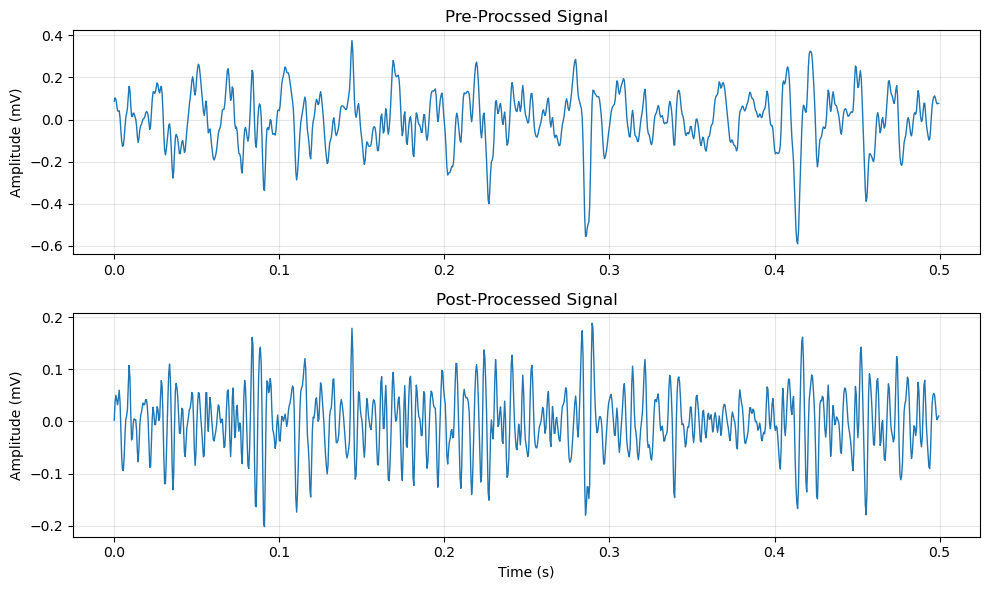

In [10]:
fs = FS  # sampling rate in Hz
t1 = np.arange(len(emg1)) / fs
t2 = np.arange(len(emg2)) / fs

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))

ax1.plot(t1, emg1, linewidth=1)
ax1.set_ylabel('Amplitude (mV)')
ax1.set_title('Pre-Procssed Signal')
ax1.grid(True, alpha=0.3)

ax2.plot(t2, emg2, linewidth=1)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Amplitude (mV)')
ax2.set_title('Post-Processed Signal')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()